# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
unique_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in unique_cities:
        unique_cities.append(city)

# Print the city count to confirm sufficient count
len(unique_cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# If reposponse OKAY, then save json to cityweather list.
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(unique_cities):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    r = requests.get(f'{base_url}q={c}&appid={api_key}&units=imperial')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(unique_cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
Processing Record   0 of 605 | Khatanga
Processing Record   1 of 605 | Atuona
Processing Record   2 of 605 | Hermanus
Processing Record   3 of 605 | Wanning
Processing Record   4 of 605 | Mataura
Processing Record   5 of 605 | Hasaki
Processing Record   6 of 605 | Pevek
City not found. Skipping...
Processing Record   8 of 605 | Hushitai
Processing Record   9 of 605 | Marawi
Processing Record  10 of 605 | Richards Bay
Processing Record  11 of 605 | Chuy
Processing Record  12 of 605 | Rikitea
Processing Record  13 of 605 | Noumea
Processing Record  14 of 605 | San Cristobal
Processing Record  15 of 605 | Kaitangata
Processing Record  16 of 605 | Vaini
Processing Record  17 of 605 | Hobart
Processing Record  18 of 605 | Kapaa
Processing Record  19 of 605 | Havelock
Processing Record  20 of 605 | Thinadhoo
Processing Record  21 of 605 | Hambantota
Processing Record  22 of 605 | Bluff
Processing Record  23 of 605 | Ambulu
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data = pd.DataFrame(cityweather)
data.head(1)

,coord,weather,base,main,wind,clouds,dt,sys,timezone,id,name,cod,rain,visibility,snow
0,"{'lon': 102.47, 'lat': 71.98}","[{'id': 804, 'main': 'Clouds', 'description': ...",model,"{'temp': -23.22, 'feels_like': -33.02, 'temp_m...","{'speed': 5.08, 'deg': 237}",{'all': 97},1576900104,"{'country': 'RU', 'sunrise': 0, 'sunset': 0}",25200,2022572,Khatanga,200,NaN,NaN,NaN


In [5]:
# Select only City, Cloudiness, Country, Date, Humidity,
# Latitude, Longitude, Max Temperature, and Wind Speed data.
cities = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
cities.to_csv('data/cities.csv', index=False)
cities.to_csv('data/cities.md', sep='|', index=False)
cities.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [6]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khatanga,97,RU,1576900104,97,71.98,102.47,-23.22,5.08
1,Atuona,4,PF,1576900689,67,-9.80,-139.03,81.10,10.51
2,Hermanus,62,ZA,1576900689,92,-34.42,19.24,60.01,1.01
3,Wanning,75,AT,1576900689,87,48.64,13.53,46.40,12.75
4,Mataura,81,NZ,1576900689,71,-46.19,168.86,55.99,8.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Max temp at -11 degrees latitude


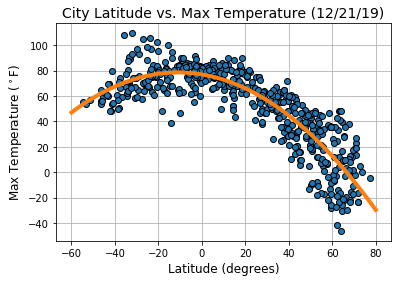

In [7]:
# Save date display as MM/DD/YY
fmt_dt = pd.to_datetime(cities['Date'][0], unit='s')
fmt_dt = fmt_dt.strftime('%m/%d/%y')

# Plot for lat vs max temp
plt.plot(cities['Lat'], cities['Max Temp'], 'o', markeredgecolor='k')

# Fit parabola to data
z = np.polyfit(cities['Lat'], cities['Max Temp'], 2)
x = np.linspace(-60, 80)
y = z[0] * pow(x, 2) + z[1] * pow(x, 1) + z[2]
print(f'Max temp at {x[np.argmax(y)]:.0f} degrees latitude')
plt.plot(x, y, lw=4)

plt.title(f'City Latitude vs. Max Temperature ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()
plt.savefig('images/lat-vs-temp.png')

#### Latitude vs. Humidity Plot

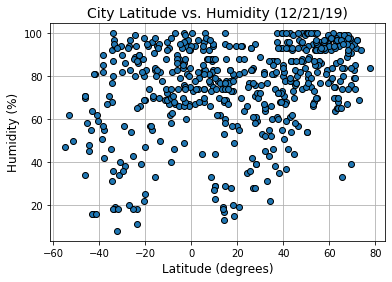

In [8]:
plt.plot(cities['Lat'], cities['Humidity'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Humidity ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-hum.png')

#### Latitude vs. Cloudiness Plot

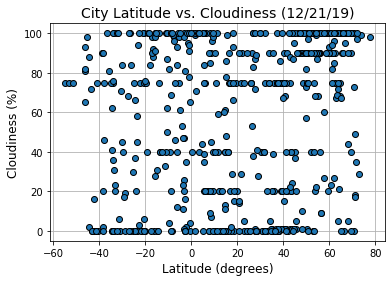

In [9]:
plt.plot( cities['Lat'], cities['Cloudiness'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Cloudiness ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-cloud.png')

#### Latitude vs. Wind Speed Plot

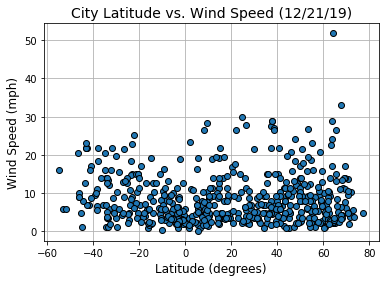

In [10]:
plt.plot(cities['Lat'], cities['Wind Speed'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Wind Speed ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.grid()
plt.savefig('images/lat-vs-speed.png')